Preposesing

In [1]:
import pandas as pd
# Membaca dataset terlebih dahulu
df_shopee_cod = pd.read_csv("../data/shopee_review_scraped.csv")

# Memilih hanya kolom 'userName', 'score', 'at', 'content'
new_df = df_shopee_cod[['userName', 'score', 'at', 'content']]

# Menampilkan 5 baris pertama untuk cek hasil
new_df.head()

,userName,score,at,content
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ..."


Case Folding

In [2]:
import re

def cleaningulasan(content):
    ulasan = re.sub(r'@[A-Za-a0-9]+',' ', content)
    ulasan = re.sub(r'#[A-Za-z0-9]+',' ', content)
    ulasan = re.sub(r"http\S+",' ', content)
    ulasan = re.sub(r'[0-9]+',' ', content)
    ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", content)
    ulasan = content.strip(' ')
    return ulasan

def clearEmoji(content):
    return content.encode('ascii', 'ignore').decode('ascii')

def replaceTOM(content):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', content)

def casefoldingText(content):
    ulasan = content.lower()
    return ulasan

# Mendefinisikan DataFrame baru dengan kolom yang dipilih
new_df_copy = new_df.copy()

# Membersihkan konten menggunakan fungsi yang telah dibuat
new_df_copy['Cleaning'] = new_df_copy['content'].apply(cleaningulasan)
new_df_copy['HapusEmoji'] = new_df_copy['Cleaning'].apply(clearEmoji)
new_df_copy['3/Lebih'] = new_df_copy['HapusEmoji'].apply(replaceTOM)
new_df_copy['CaseFolding'] = new_df_copy['3/Lebih'].apply(casefoldingText)

# Mengurutkan DataFrame berdasarkan kolom 'at'
sorted_df = new_df_copy.sort_values(by='at', ascending=False)


In [3]:
new_df_copy.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ..."


Pelabelan Dataset

In [4]:
label = []
for index, row in new_df.iterrows():
  if row['score'] == 1 or row['score'] == 2:
    label.append('Negatif')
  elif row['score'] == 3:
    label.append('Netral')
  else:
    label.append('Positif')
new_df_copy['sentimen'] = label


In [5]:
new_df_copy.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif


Tokenizing

In [8]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [9]:
from nltk.tokenize import word_tokenize

def tokenizingText(content):
    ulasan = word_tokenize(content)
    return ulasan

# Menerapkan tokenizingText pada setiap elemen di kolom 'CaseFolding'
new_df_copy['Tokenizing'] = new_df_copy['CaseFolding'].apply(tokenizingText)

In [12]:
new_df_copy.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif,"[shopee, yang, sekarang, kualitasnya, bagus, t..."
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif,"[apk, belanja, yang, mudah, dan, beragam, pili..."
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif,"[tidak, bisa, melakukan, pembayaran, listrik, ..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif,"[sudah, dua, bulan, ,, setiap, buka, langsung,..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif,"[aplikasi, paling, ga, jelas, ,, hp, ku, resta..."


Formalisasi

In [18]:
import os

file_path = "../data/slangwords.txt"

if os.path.exists(file_path):
    print("File ditemukan ✅")
else:
    print("File tidak ditemukan ❌")


File ditemukan ✅


In [19]:
def convertToSlangword(tokens):
    # Load slang word dictionary from a file
    with open("../data/slangwords.txt", "r") as file:
        kamusSlang = eval(file.read())

    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')
    content = []

    for kata in tokens:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()], kata)
        content.append(filterSlang.lower())

    return content

# Assuming 'new_df' contains the data
new_df_copy['Formalisasi'] = new_df_copy['Tokenizing'].apply(convertToSlangword)

In [20]:
new_df_copy.head(20)

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif,"[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, yang, sekarang, kualitasnya, bagus, t..."
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif,"[apk, belanja, yang, mudah, dan, beragam, pili...","[aplikasi, belanja, yang, mudah, dan, beragam,..."
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif,"[tidak, bisa, melakukan, pembayaran, listrik, ...","[tidak, bisa, melakukan, pembayaran, listrik, ..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif,"[sudah, dua, bulan, ,, setiap, buka, langsung,...","[sudah, dua, bulan, ,, setiap, buka, langsung,..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif,"[aplikasi, paling, ga, jelas, ,, hp, ku, resta...","[aplikasi, paling, ga, jelas, ,, seluler, ku, ..."
5,Pengguna Google,2,2025-03-15 08:13:43,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,lagi pengen belanja pakai shoopepay dan barang...,Negatif,"[lagi, pengen, belanja, pakai, shoopepay, dan,...","[lagi, ingin, belanja, pakai, shoopepay, dan, ..."
6,Pengguna Google,5,2025-03-15 11:22:43,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,sangat membantu buat para wanita yg males bela...,Positif,"[sangat, membantu, buat, para, wanita, yg, mal...","[sangat, membantu, buat, para, wanita, yang, m..."
7,Pengguna Google,1,2025-03-15 10:55:47,Buka awal aplikasi shopee otomatis ke sesi liv...,Buka awal aplikasi shopee otomatis ke sesi liv...,Buka awal aplikasi shopee otomatis ke sesi liv...,Buka awal aplikasi shopee otomatis ke sesi liv...,buka awal aplikasi shopee otomatis ke sesi liv...,Negatif,"[buka, awal, aplikasi, shopee, otomatis, ke, s...","[buka, awal, aplikasi, shopee, otomatis, ke, s..."
8,Pengguna Google,5,2025-03-15 08:14:08,"Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","shopee bagus bgt, sejauh ini ga pernah ada ken...",Positif,"[shopee, bagus, bgt, ,, sejauh, ini, ga, perna...","[shopee, bagus, banget, ,, sejauh, ini, ga, pe..."
9,Pengguna Google,1,2025-03-13 15:01:27,"Transaksi saya selalu dibatalkan sistem, padah...","Transaksi saya selalu dibatalkan sistem, padah...","Transaksi saya selalu dibatalkan sistem, padah...","Transaksi saya selalu dibatalkan sistem, padah

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

daftar_stopword = stopwords.words('indonesian')
# Append additional stopwords
daftar_stopword.extend(["yg", "dg", "rt"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
    return [word for word in words if word not in daftar_stopword]

# Assuming 'new_df' contains the data and 'Tokenizing' column has the tokenized words
new_df_copy['WithoutStopwords'] = new_df_copy['Tokenizing'].apply(stopwordText)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
new_df_copy.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi,WithoutStopwords
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif,"[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, kualitasnya, bagus, parahnya, pengiri..."
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif,"[apk, belanja, yang, mudah, dan, beragam, pili...","[aplikasi, belanja, yang, mudah, dan, beragam,...","[apk, belanja, mudah, beragam, pilihan, toko, ..."
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif,"[tidak, bisa, melakukan, pembayaran, listrik, ...","[tidak, bisa, melakukan, pembayaran, listrik, ...","[pembayaran, listrik, ,, pembayaran, tulisan, ..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif,"[sudah, dua, bulan, ,, setiap, buka, langsung,...","[sudah, dua, bulan, ,, setiap, buka, langsung,...","[,, buka, langsung, diarahin, live, video, ,, ..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif,"[aplikasi, paling, ga, jelas, ,, hp, ku, resta...","[aplikasi, paling, ga, jelas, ,, seluler, ku, ...","[aplikasi, ga, ,, hp, ku, restart, ulang, data..."


In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in new_df_copy['WithoutStopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

new_df_copy['Stemming'] = new_df_copy['WithoutStopwords'].swifter.apply(stemmingText)

d:\Python 3.10.7\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


shopee : shopee
kualitasnya : kualitas
bagus : bagus
parahnya : parah
pengiriman : kirim
. : 
sistemnya : sistem
mengutamakan : utama
ekspedisi : ekspedisi
express : express
pelanggan : langgan
kecewa : kecewa
paket : paket
3x : 3x
dilaporan : lapor
kurir : kurir
ditugaskan : tugas
diantar : antar
kurirnya : kurir
wa : wa
diantarkan : antar
menanggapi : tanggap
, : 
paketnya : paket
laporannya : lapor
penerima : terima
ditempat : tempat
dihubungi : hubung
dikembalikan : kembali
pengirim : kirim
gila : gila
gak : gak
sih : sih
? : 
apk : apk
belanja : belanja
mudah : mudah
beragam : agam
pilihan : pilih
toko : toko
terpercaya : percaya
voucher : voucher
terkadang : terkadang
ongkos : ongkos
kirim : kirim
mahal : mahal
promo : promo
menarik : tarik
event : event
transparan : transparan
mengadakan : ada
flash : flash
sale : sale
tanggal : tanggal
cantik : cantik
masyarakat : masyarakat
bingung : bingung
serba : serba
10. : 10
kali : kali
mengikuti : ikut
tsb : tsb
minim : minim
peluang : 

Pandas Apply: 100%|██████████| 5000/5000 [00:00<00:00, 237745.38it/s]


In [24]:
new_df_copy.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi,WithoutStopwords,Stemming
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif,"[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, kualitasnya, bagus, parahnya, pengiri...","[shopee, kualitas, bagus, parah, kirim, , sist..."
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif,"[apk, belanja, yang, mudah, dan, beragam, pili...","[aplikasi, belanja, yang, mudah, dan, beragam,...","[apk, belanja, mudah, beragam, pilihan, toko, ...","[apk, belanja, mudah, agam, pilih, toko, perca..."
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif,"[tidak, bisa, melakukan, pembayaran, listrik, ...","[tidak, bisa, melakukan, pembayaran, listrik, ...","[pembayaran, listrik, ,, pembayaran, tulisan, ...","[bayar, listrik, , bayar, tulis, , downloading..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif,"[sudah, dua, bulan, ,, setiap, buka, langsung,...","[sudah, dua, bulan, ,, setiap, buka, langsung,...","[,, buka, langsung, diarahin, live, video, ,, ...","[, buka, langsung, diarahin, live, video, , su..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif,"[aplikasi, paling, ga, jelas, ,, hp, ku, resta...","[aplikasi, paling, ga, jelas, ,, seluler, ku, ...","[aplikasi, ga, ,, hp, ku, restart, ulang, data...","[aplikasi, ga, , hp, ku, restart, ulang, data,..."


In [25]:
# Jika new_df_copy adalah salinan yang ingin dimodifikasi
train_s0 = new_df_copy[new_df_copy['sentimen'] == 'Negatif'].copy()

# Mengisi nilai yang hilang pada kolom 'content' untuk baris yang terfilter
train_s0.loc[:, 'content'] = train_s0['content'].fillna("tidak ada komentar")

# Menampilkan beberapa baris pertama dari DataFrame yang telah dimodifikasi
train_s0.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi,WithoutStopwords,Stemming
0,Pengguna Google,1,2025-03-15 13:05:26,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,Shopee yang sekarang kualitasnya bagus tetapi ...,shopee yang sekarang kualitasnya bagus tetapi ...,Negatif,"[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, yang, sekarang, kualitasnya, bagus, t...","[shopee, kualitasnya, bagus, parahnya, pengiri...","[shopee, kualitas, bagus, parah, kirim, , sist..."
2,Pengguna Google,1,2025-03-15 14:16:55,"Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","Tidak bisa melakukan pembayaran listrik, dan p...","tidak bisa melakukan pembayaran listrik, dan p...",Negatif,"[tidak, bisa, melakukan, pembayaran, listrik, ...","[tidak, bisa, melakukan, pembayaran, listrik, ...","[pembayaran, listrik, ,, pembayaran, tulisan, ...","[bayar, listrik, , bayar, tulis, , downloading..."
3,Pengguna Google,1,2025-03-15 05:13:35,"Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","Sudah dua bulan, setiap buka langsung diarahin...","sudah dua bulan, setiap buka langsung diarahin...",Negatif,"[sudah, dua, bulan, ,, setiap, buka, langsung,...","[sudah, dua, bulan, ,, setiap, buka, langsung,...","[,, buka, langsung, diarahin, live, video, ,, ...","[, buka, langsung, diarahin, live, video, , su..."
4,Pengguna Google,1,2025-03-15 08:03:40,"Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","Aplikasi paling ga jelas, hp ku restart ulang ...","aplikasi paling ga jelas, hp ku restart ulang ...",Negatif,"[aplikasi, paling, ga, jelas, ,, hp, ku, resta...","[aplikasi, paling, ga, jelas, ,, seluler, ku, ...","[aplikasi, ga, ,, hp, ku, restart, ulang, data...","[aplikasi, ga, , hp, ku, restart, ulang, data,..."
5,Pengguna Google,2,2025-03-15 08:13:43,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,Lagi Pengen belanja pakai shoopepay dan barang...,lagi pengen belanja pakai shoopepay dan barang...,Negatif,"[lagi, pengen, belanja, pakai, shoopepay, dan,...","[lagi, ingin, belanja, pakai, shoopepay, dan, ...","[pengen, belanja, pakai, shoopepay, barangnya,...","[ken, belanja, pakai, shoopepay, barang, limit..."


In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

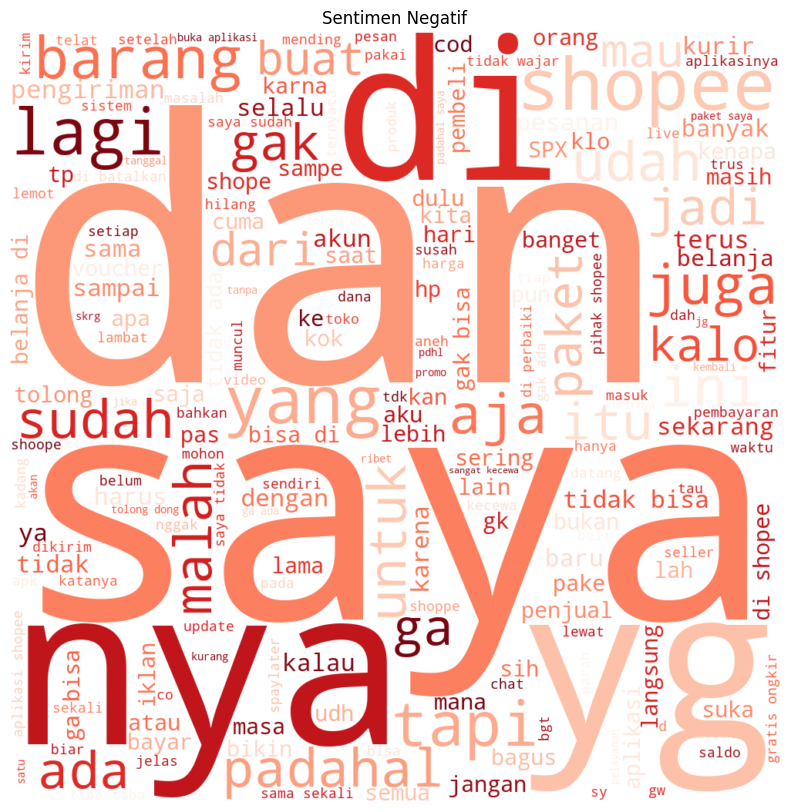

In [28]:
all_text_s0 = ' '.join(word for word in train_s0['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Negatif")
plt.show()

In [29]:
train_s1 = new_df_copy[new_df_copy['sentimen'] == 'Netral'].copy()
train_s1.loc[:, 'content'] = train_s1['content'].fillna("tidak ada komentar")
train_s1.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi,WithoutStopwords,Stemming
28,Pengguna Google,3,2025-03-16 15:31:06,Sebenarnya saya puas bgt memakai aplikasi bela...,Sebenarnya saya puas bgt memakai aplikasi bela...,Sebenarnya saya puas bgt memakai aplikasi bela...,Sebenarnya saya puas bgt memakai aplikasi bela...,sebenarnya saya puas bgt memakai aplikasi bela...,Netral,"[sebenarnya, saya, puas, bgt, memakai, aplikas...","[sebenarnya, saya, puas, banget, memakai, apli...","[puas, bgt, memakai, aplikasi, belanja, shopee...","[puas, bgt, pakai, aplikasi, belanja, shopee, ..."
56,Pengguna Google,3,2025-03-12 13:54:26,"Mau ngasih saran nih min, kalo buka app jangan...","Mau ngasih saran nih min, kalo buka app jangan...","Mau ngasih saran nih min, kalo buka app jangan...","Mau ngasih saran nih min, kalo buka app jangan...","mau ngasih saran nih min, kalo buka app jangan...",Netral,"[mau, ngasih, saran, nih, min, ,, kalo, buka, ...","[mau, memberikan, saran, ini, min, ,, kalau, b...","[ngasih, saran, nih, min, ,, kalo, buka, app, ...","[ngasih, saran, nih, min, , kalo, buka, app, l..."
61,Pengguna Google,3,2025-02-24 12:16:10,"Sekarang malah bikin kecewa,estimasi terlalu l...","Sekarang malah bikin kecewa,estimasi terlalu l...","Sekarang malah bikin kecewa,estimasi terlalu l...","Sekarang malah bikin kecewa,estimasi terlalu l...","sekarang malah bikin kecewa,estimasi terlalu l...",Netral,"[sekarang, malah, bikin, kecewa, ,, estimasi, ...","[sekarang, bahkan, bikin, kecewa, ,, estimasi,...","[bikin, kecewa, ,, estimasi, ,, jasa, pengirim...","[bikin, kecewa, , estimasi, , jasa, kirim, suk..."
67,Pengguna Google,3,2025-03-09 02:46:43,Sekian lama memakai aplikasi shopee baru kali ...,Sekian lama memakai aplikasi shopee baru kali ...,Sekian lama memakai aplikasi shopee baru kali ...,Sekian lama memakai aplikasi shopee baru kali ...,sekian lama memakai aplikasi shopee baru kali ...,Netral,"[sekian, lama, memakai, aplikasi, shopee, baru...","[sekian, lama, memakai, aplikasi, shopee, baru...","[sekian, memakai, aplikasi, shopee, kali, biki...","[sekian, pakai, aplikasi, shopee, kali, bikin,..."
113,Pengguna Google,3,2025-03-11 03:54:48,"Sekarang shopee suka ngadat, buka aplikasi lan...","Sekarang shopee suka ngadat, buka aplikasi lan...","Sekarang shopee suka ngadat, buka aplikasi lan...","Sekarang shopee suka ngadat, buka aplikasi lan...","sekarang shopee suka ngadat, buka aplikasi lan...",Netral,"[sekarang, shopee, suka, ngadat, ,, buka, apli...","[sekarang, shopee, suka, lelet, ,, buka, aplik...","[shopee, suka, ngadat, ,, buka, aplikasi, lang...","[shopee, suka, ngadat, , buka, aplikasi, langs..."


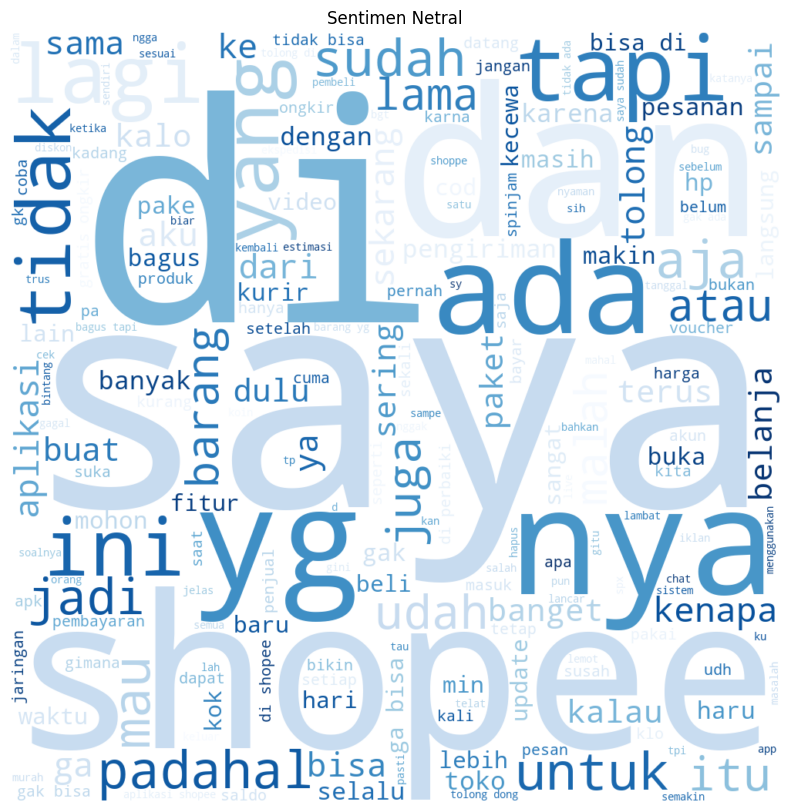

In [30]:
all_text_s1 = ' '.join(word for word in train_s1['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Netral")
plt.show()

In [31]:
train_s2 = new_df_copy[new_df_copy['sentimen'] == 'Positif'].copy()
train_s2.loc[:, 'content'] = train_s2['content'].fillna("tidak ada komentar")
train_s2.head()

,userName,score,at,content,Cleaning,HapusEmoji,3/Lebih,CaseFolding,sentimen,Tokenizing,Formalisasi,WithoutStopwords,Stemming
1,Pengguna Google,4,2025-03-16 04:29:12,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,Apk belanja yang mudah dan beragam pilihan tok...,apk belanja yang mudah dan beragam pilihan tok...,Positif,"[apk, belanja, yang, mudah, dan, beragam, pili...","[aplikasi, belanja, yang, mudah, dan, beragam,...","[apk, belanja, mudah, beragam, pilihan, toko, ...","[apk, belanja, mudah, agam, pilih, toko, perca..."
6,Pengguna Google,5,2025-03-15 11:22:43,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,Sangat membantu buat para wanita yg males bela...,sangat membantu buat para wanita yg males bela...,Positif,"[sangat, membantu, buat, para, wanita, yg, mal...","[sangat, membantu, buat, para, wanita, yang, m...","[membantu, wanita, males, belanja, ,, eheheh, ...","[bantu, wanita, males, belanja, , eheheh, cari..."
8,Pengguna Google,5,2025-03-15 08:14:08,"Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","Shopee bagus bgt, sejauh ini ga pernah ada ken...","shopee bagus bgt, sejauh ini ga pernah ada ken...",Positif,"[shopee, bagus, bgt, ,, sejauh, ini, ga, perna...","[shopee, bagus, banget, ,, sejauh, ini, ga, pe...","[shopee, bagus, bgt, ,, ga, kendala, lancar, a...","[shopee, bagus, bgt, , ga, kendala, lancar, aj..."
13,Pengguna Google,4,2025-03-15 13:00:44,"untuk kemanan bertransaksi sangat aman,sayangn...","untuk kemanan bertransaksi sangat aman,sayangn...","untuk kemanan bertransaksi sangat aman,sayangn...","untuk kemanan bertransaksi sangat aman,sayangn...","untuk kemanan bertransaksi sangat aman,sayangn...",Positif,"[untuk, kemanan, bertransaksi, sangat, aman, ,...","[untuk, kemanan, bertransaksi, sangat, aman, ,...","[kemanan, bertransaksi, aman, ,, sayangnya, me...","[keman, transaksi, aman, , sayang, metode, bay..."
14,Pengguna Google,5,2025-03-14 19:02:29,Makin kedepannya kayaknya Aplikasinya makin be...,Makin kedepannya kayaknya Aplikasinya makin be...,Makin kedepannya kayaknya Aplikasinya makin be...,Makin kedepannya kayaknya Aplikasinya makin be...,makin kedepannya kayaknya aplikasinya makin be...,Positif,"[makin, kedepannya, kayaknya, aplikasinya, mak...","[makin, kedepannya, kayaknya, aplikasinya, mak...","[kedepannya, kayaknya, aplikasinya, berat, ,, ...","[depan, kayak, aplikasi, berat, , hp, jd, lot,..."


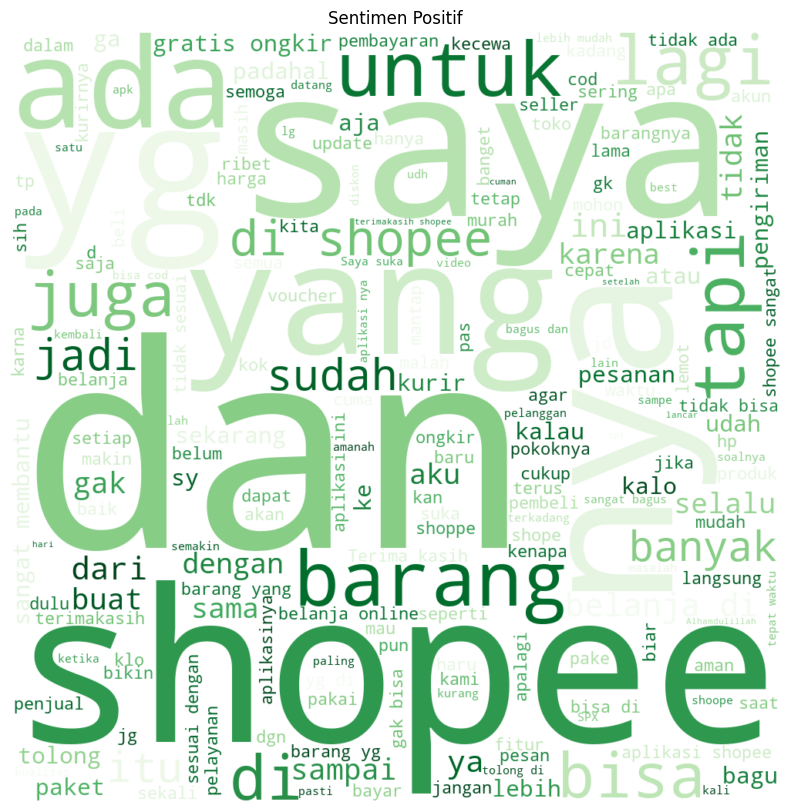

In [32]:
all_text_s2 = ' '.join(word for word in train_s2['content'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Positif")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

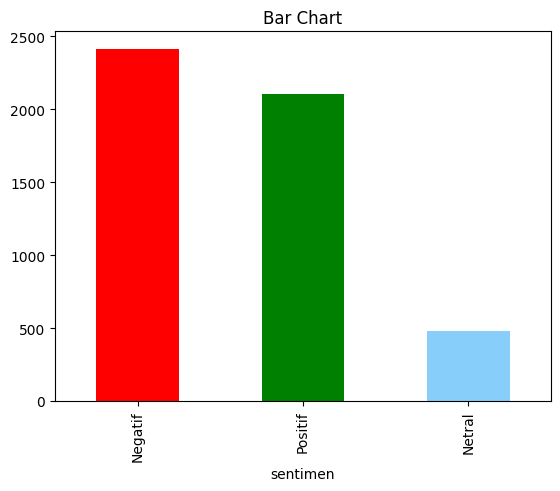

In [33]:
sentimen_data = pd.value_counts(new_df_copy['sentimen'], sort=True)
sentimen_data.plot(kind='bar', color=['red', 'green', 'lightskyblue'])
plt.title("Bar Chart")
plt.show 